# 1: Iris with no labels

Welcome to the first episode of The Semi-Supervised Shenanigans!! This episode we will experiment semi-supervised learning techniques with a rather easy well-known dataset, the Iris species dataset.  

## EDA

We're kicking things off today with some exploration to the data, exploring a dataset is a cruical step in any machine learning or data science based project. Odds are in our favour python has alot - and I mean alot - of methods to help us exploring the iris through libraries as pandas & matplotlib.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('iris.csv', index_col = 'Id')

In [72]:
print(data.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa


After importing the essential libraries & the iris dataset we viewed the first five rows of it using pd.head() method. We found out that there are 5 essential columns with an additional identificator column "Id" which was assigned to the row indexing of the dataframe "data" through the index_col argument of pd.read_csv() method. 

So to make ourselves clear, what we are going to do is we will put aside our target column - the column we usually predict - "Species" & try to reconstruct it again with clustering techniques. Then we train a supervised learning model over the data with the new generated column & compare the result with both the generated & the original target column. But first, let us explore this data well !!

### The target column

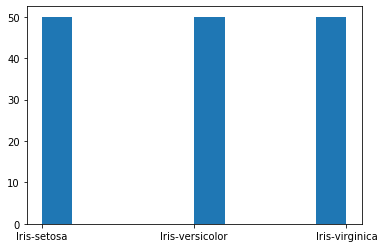

In [73]:
plt.hist(data.Species,bins = 10)
plt.show()

We can observe here that the three species -setosa,verginica & versicolor are evenly matched in terms of number of samples. Which makes us nothing but more curious to explore the explanatory variables.

### Explanatory Variables

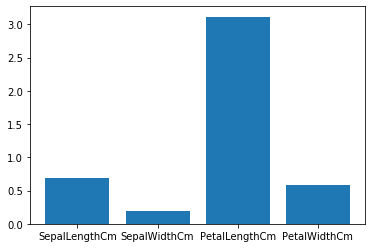

In [74]:
var_arr = [col[1].var() for col in data.drop('Species',axis = 1).iteritems()]
plt.bar(x = data.drop('Species',axis = 1).columns,height=var_arr)
plt.show()

Since all the four explanatory variables are numerical, it made sense to check and compare their vaiances. The more variance a feature have the more it can effect the clustering/classifying process. Appearently petal length is the one with hieghest variance - rescalling is considered -, while sepal length is the second in oreder of variance with petal width as a close third. So we will view how the species are distributed for the two highest of variance features.

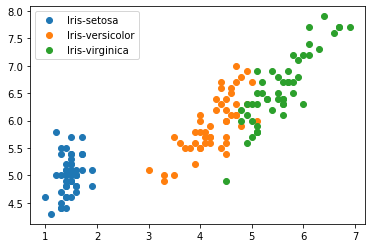

In [75]:
groups = data.groupby("Species")
for name, group in groups:
    plt.plot(group["PetalLengthCm"], group["SepalLengthCm"], marker="o", linestyle="", label=name)
plt.legend()

Here we can see that setosa "blue" are quite distingusihable while versicolor "orange" & virginica "green" are corssing each other's boundaries. Let's check on this graph once again after scaling our data. "Formally, If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized". (Akanksha_Rai - GFG).

## Scaling & modifying data

In [76]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Species',axis = 1))
scaled_data = pd.DataFrame(scaled_data)
scaled_data["Species"] = " "
for i in range(len(scaled_data.Species)):
    scaled_data.iloc[i,4] = data.iloc[i,4]
scaled_data.columns = data.columns 
scaled_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


Here we first imported the standard scaler that we will use & intiallized an instance of it. Then we get it to learn some descriptions on the data and apply its transformation -scaling- on it through the StandardScaler.fit_transform() metod. The next bit of code is just adjusting the data. Next we will see the previous two plots after scaling.

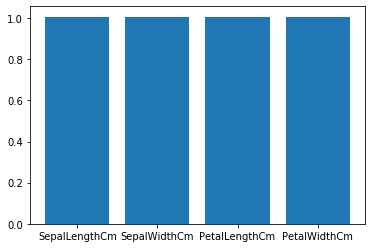

In [77]:
var_arr = [col[1].var() for col in scaled_data.drop('Species',axis = 1).iteritems()]
plt.bar(x = scaled_data.drop('Species',axis = 1).columns,height=var_arr)
plt.show()

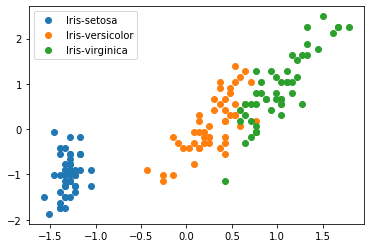

In [78]:
groups = scaled_data.groupby("Species")
for name, group in groups:
    plt.plot(group["PetalLengthCm"], group["SepalLengthCm"], marker="o", linestyle="", label=name)
plt.legend()

In the second histogram shows that we got a variance of 1 in all of our variables after scaling, which means that now all of our variables can participate in clustering & classification equally. However the second plot didn't change at all which is also a good sign that means scaling variables didn't change the reality of the data so we are literally working with the same information here with some beneficial modifications.

## Let's cluster this

I just love the iris dataset, I think it is the most suitable data for beginners, few variables with not so much work to do. So after we adjusted our four explanatory variables we need to start constructing the new target variables. So indeed we need to establish three clusters representing the three iris species, when the number of clusters is predefined it is good to go with a centroid-based algorithm as k-means clustering.

In [79]:
from sklearn.cluster import KMeans
clustered_data = scaled_data
model = KMeans(n_clusters = 3)
model.fit_predict(scaled_data.drop('Species',axis=1))
clustered_data['cluster'] = 0
for i in range(len(model.labels_)):
    clustered_data.iloc[i,5] = model.labels_[i]

Here we imported the KMeans class from the cluster module of sklearn, then we copied our scaled data into a new data set called clusterd_data. We initialized the KMeans model with 3 clusters representing the three iris species. Then we call the KMeans.fit_predict() to assign each point of our dataset into a different cluster then we copy those resulted cluster labels to our new dataset then we will try to explore those cluster labels.

140.96581663074699


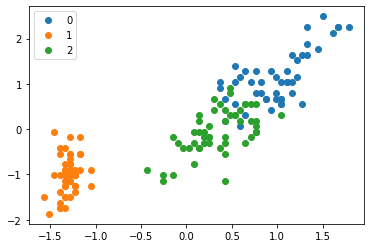

In [80]:
groups = clustered_data.groupby("cluster")
for name, group in groups:
    plt.plot(group["PetalLengthCm"], group["SepalLengthCm"], marker="o", linestyle="", label=name)
plt.legend()
print(model.inertia_)

We achieved an inertia of 140 which is not bad at all ! Baisically inertia is the sum of squared distances between cluster points & their corresponding cluster centers. A good clustering is a clustering that porduces tight clusters, you want your clustered points to be as much close from their centers & the clusters themselves to be as much far from each other. However all of this evaluating metrics aren't our main persue here, what we want to achieve at the end is a fair model accuracy on both cluster & original label even if clusters are a little scattered.

What is important to comment on is the latest graph here with only changing the variable of coloring to the cluster labels. It is fair to say that it is quite similar to the one before it with the original species variable which is a good sign indeed.
Note that 0 is for virginica 1 is for setosa & 2 is for versicolor.

## Applying the decision tree

As we saw in the scatter plots above that boundaries might not be linear for all of the explanatory variables, so I thought it would be better to use a decision tree clasifier.

In [81]:
clustered_data["species"] = 0
for i in range(len(clustered_data.Species)):
    if(clustered_data.iloc[i,4] == "Iris-virginica"):
        clustered_data.iloc[i,6] = 0
    elif(clustered_data.iloc[i,4] == "Iris-setosa"):
        clustered_data.iloc[i,6] = 1
    else:
        clustered_data.iloc[i,6] = 2
clustered_data = clustered_data.drop("Species",axis =1)
for i in range(5):
    clustered_data = clustered_data.sample(frac=1)
clustered_data.head()
from sklearn.model_selection import train_test_split
X = clustered_data.drop(['species','cluster'],axis = 1)
y = clustered_data.species
y_= clustered_data.cluster
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
X2_train,X2_test,y__train,y__test = train_test_split(X,y_,test_size = 0.25,random_state = 42)
X_train.head()
# We are concerned with X_train,X_test,y__train,y__test & y_test.


So here we start by encoding the Species column into numbers, I know python has alot of encoding metohds but I just love looping, makes me comfortable, then shuffling the entire dataset 5 times just to make sure that samples are fairly distributed among both the train & test datasets. Then we import the train_test_split static method from model_selection module of the sklearn library. What this function does is that it splits our dataset into four sections for Explanatory variables & target variable in train & test set which makes it much easier to work with in the sklearn api. Then we repeat the split process 2 times one for each target variable using the same random_state to make sure that the sample distribution is the same across the 2 sets.

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_train,y__train)
y_pred = model.predict(X_test)
print("Accuracy on clustered labels:",metrics.accuracy_score(y__test, y_pred))
print("Accuracy on original labels:",metrics.accuracy_score(y_test, y_pred))

Accuracy on clustered labels: 0.9736842105263158
Accuracy on original labels: 0.7894736842105263


This part is really simple, we import the DecisionTreeClassifier that we will use alongside the accuracy metrics class tom measure our model's performance. Then we fit the model to the data using the clusterd labels on fitting, the next step is we predict the species for the test dataset. Finally, we measure the accuracy of the model on both the clustered labels & the original labels.

## Conclusion

Achieving higher accuracy on clustered labels means one thing, that the decision tree did actually a great job in learning from the data as we used the cluster labels to train the model. However the clustering itself had some troubles in mirroring the reality -the original column- which lead to deffects on testing with the original labels.

Semi-Supervised techniques are relly cool & they can save you with unlabelled data, but here we are just having fun with some clear & easy data to be sure that we all get the vibe of the series including both newcomers & ninjas.

I hope you enjoyed as much as I did with this epsiode of the Semi-Supervised Shenanigans series, if you like it make sure to follow me on Github here & if you have a suggession feel free to contact me. See you later, alligator.